<a href="https://colab.research.google.com/github/claretnbluejoffy/MastersProject/blob/main/conv_layer_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.set_printoptions(suppress=True)



In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

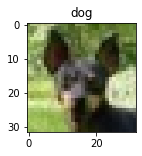

In [ ]:
i=2500
label = y_train[i]
image = x_train[i]
plt.figure(figsize=(2,2))
plt.grid(False)
plt.title((labels[int(label)]))
plt.imshow(image)
plt.show()

In [ ]:
y_input = tf.keras.utils.to_categorical(y_train)
x_input = (x_train/255.0).astype(np.float32)

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),activation=tf.nn.relu,padding='same')
flat_layer = tf.keras.layers.Flatten()
dense_layer = tf.keras.layers.Dense(units=32,activation=tf.nn.relu)
logits_layer = tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)


In [ ]:
def predict(x):
    x = conv_layer(x)
    x = flat_layer(x)
    x = dense_layer(x)
    output_layer = logits_layer(x)

    return output_layer

In [ ]:
@tf.function
def loss(x,y):
    y_ = predict(x)
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_), axis=[1]))
    return cross_entropy

In [ ]:
lr = 0.0001
train_steps = 1000
# we'll use the Adam optimizer instead of gradient descent.
optimizer = tf.optimizers.Adam(lr)

In [ ]:
for i in range(train_steps):
    with tf.GradientTape() as tape:
        current_loss = loss(x_input,y_input)
        gradients = tape.gradient(current_loss, tape.watched_variables())
        optimizer.apply_gradients(zip(gradients, tape.watched_variables()))
        if i%100 == 0:
            print('Training Step:' + str(i) + ' Loss = ' + str(current_loss))

Training Step:0 Loss = tf.Tensor(2.4638598, shape=(), dtype=float32)
Training Step:100 Loss = tf.Tensor(1.9042103, shape=(), dtype=float32)
Training Step:200 Loss = tf.Tensor(1.7396367, shape=(), dtype=float32)
Training Step:300 Loss = tf.Tensor(1.607892, shape=(), dtype=float32)
Training Step:400 Loss = tf.Tensor(1.4829993, shape=(), dtype=float32)
Training Step:500 Loss = tf.Tensor(1.3707719, shape=(), dtype=float32)
Training Step:600 Loss = tf.Tensor(1.2948655, shape=(), dtype=float32)
Training Step:700 Loss = tf.Tensor(1.2439791, shape=(), dtype=float32)
Training Step:800 Loss = tf.Tensor(1.2044584, shape=(), dtype=float32)
Training Step:900 Loss = tf.Tensor(1.1714169, shape=(), dtype=float32)


In [ ]:
y_prob = predict(x_input).numpy()

print(y_prob.shape)
y_pred = np.argmax(y_prob,axis=-1)
print('train accuracy: ', np.sum(y_pred==y_train[:,0])/len(y_train))

(50000, 10)
train accuracy:  0.60668


In [ ]:
## shallow should be around 0.4 accuracy
x_test_input = (x_test/ 255.0).astype(np.float32)

y_prob = predict(x_test_input).numpy()

print(y_prob.shape)
y_pred = np.argmax(y_prob,axis=-1)
print('test accuracy: ', np.sum(y_pred==y_test[:,0])/len(y_test))

(10000, 10)
test accuracy:  0.5523


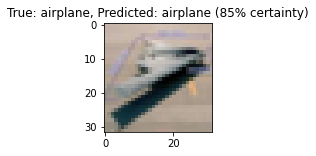

In [ ]:
i=264


label = y_test[i]
image = x_test[i]
plt.figure(figsize=(2,2))
plt.grid(False)
plt.title('True: %s, Predicted: %s (%d%% certainty)' % (labels[int(label)],labels[y_prob[i].argmax()],100*y_prob[i,y_prob[i].argmax()]))
plt.imshow(image)
plt.show()